In [433]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import warnings

In [434]:
warnings.filterwarnings('ignore')

In [435]:
data = pd.read_csv('tmdb_5000_movies.csv')
data2 = pd.read_csv('tmdb_5000_credits.csv')
data.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [436]:
columns = data.columns.to_list()
good_list = columns[:1] + columns[8:9] + columns[11:14] + columns[-3:-1]
new_data = data[good_list]

In [437]:
new_data.head(3)

,budget,popularity,release_date,revenue,runtime,title,vote_average
0,237000000,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2
1,300000000,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9
2,245000000,107.376788,2015-10-26,880674609,148.0,Spectre,6.3


In [438]:
new_data.dtypes

budget            int64
popularity      float64
release_date     object
revenue           int64
runtime         float64
title            object
vote_average    float64
dtype: object

In [439]:
new_data.index = new_data.title
new_data.drop('title', axis=1, inplace=True)

In [440]:
new_data.head(3)

,budget,popularity,release_date,revenue,runtime,vote_average
title,,,,,,
Avatar,237000000,150.437577,2009-12-10,2787965087,162.0,7.2
Pirates of the Caribbean: At World's End,300000000,139.082615,2007-05-19,961000000,169.0,6.9
Spectre,245000000,107.376788,2015-10-26,880674609,148.0,6.3


In [441]:
split = new_data.release_date.str.split('-')
new_data.release_date = split.str.get(0)

In [442]:
new_data.release_date.value_counts()

release_date
2009    247
2014    238
2006    237
2013    231
2008    227
       ... 
1935      1
1932      1
1916      1
1934      1
1925      1
Name: count, Length: 90, dtype: int64

In [443]:
new_data.release_date.unique()

array(['2009', '2007', '2015', '2012', '2010', '2016', '2006', '2008',
       '2013', '2011', '2014', '2005', '1997', '2004', '1999', '1995',
       '2003', '2001', '2002', '1998', '2000', '1990', '1991', '1994',
       '1996', '1982', '1993', '1979', '1992', '1989', '1984', '1988',
       '1978', '1962', '1980', '1972', '1981', '1968', '1985', '1940',
       '1963', '1987', '1986', '1973', '1983', '1976', '1977', '1970',
       '1971', '1969', '1960', '1965', '1964', '1927', '1974', '1937',
       '1975', '1967', '1951', '1961', '1946', '1953', '1954', '1959',
       '1932', '1947', '1956', '1945', '1952', '1930', '1966', '1939',
       '1950', '1948', '1958', '1957', '1944', '1938', '1949', '1936',
       '2017', '1941', '1955', '1942', '1929', '1935', nan, '1933',
       '1916', '1934', '1925'], dtype=object)

In [444]:
new_data.isna().sum()

budget          0
popularity      0
release_date    1
revenue         0
runtime         2
vote_average    0
dtype: int64

In [445]:
new_data.dropna(subset=['release_date', 'runtime'], inplace=True)

In [446]:
new_data.isna().sum()

budget          0
popularity      0
release_date    0
revenue         0
runtime         0
vote_average    0
dtype: int64

In [447]:
new_data.release_date = new_data.release_date.astype('int64')

In [448]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, Avatar to My Date with Drew
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4800 non-null   int64  
 1   popularity    4800 non-null   float64
 2   release_date  4800 non-null   int64  
 3   revenue       4800 non-null   int64  
 4   runtime       4800 non-null   float64
 5   vote_average  4800 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 262.5+ KB


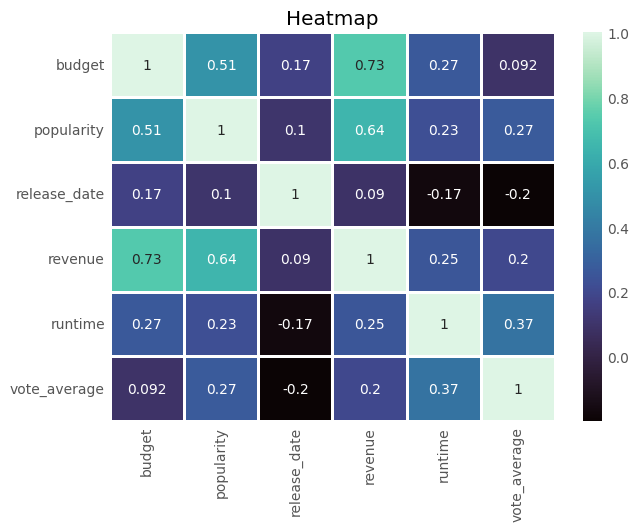

<Figure size 640x480 with 0 Axes>

In [449]:
sns.heatmap(new_data.corr(), annot=True, cmap='mako', linewidths=2, linecolor='white')
plt.title('Heatmap')
plt.show()
plt.clf()

In [450]:
X = new_data[['budget', 'popularity', 'release_date', 'runtime']]
y = new_data['vote_average']

In [ ]:
X.tail()

In [ ]:
y.tail()

In [ ]:
sns.heatmap(X.corr(), annot=True, cmap='mako', linewidths=2, linecolor='white')
plt.title('Heatmap')
plt.show()
plt.clf()

In [ ]:
plt.style.use('ggplot')
sns.pairplot(X, diag_kind='kde')
plt.show()
plt.clf()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
X, y

In [ ]:
plt.style.use('ggplot')
sns.pairplot(pd.DataFrame(X), diag_kind='kde')
plt.show()
plt.clf()

In [ ]:
y = np.array(y)
y

In [ ]:
regressor = KNeighborsRegressor(n_neighbors=50, weights='uniform')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
model = regressor.fit(X_train, y_train)

In [ ]:
model.predict([[0.00000000e+00, 9.78363013e-04, 9.50495050e-01, 2.89940828e-01],
               [0.00000000e+00, 2.20369235e-03, 8.81188119e-01, 2.66272189e-01],
               [6.44736842e-01, 1.22634484e-01, 9.80198020e-01, 4.37869822e-01]]
)